
# Dyadic Δ Scan (v6) — bases {2, 3, 5, 10} · powers {2, 3}

This notebook extends *v5* with the **first three “gap‑bridges”**:

1. **Unique minimiser tracking** — records tie counts for *p = 2, base 2* and flags when multiple numerators share the same minimum Δ.  
2. **Cross‑base sweep** — repeats the experiment for denominators \(b^{\,n}\) with \(b\in\{2,3,5,10\}\).  
   *Expected slopes*:  \(\beta_{p,b} = -p\,\log_2 b\).  
3. **κ‑factor extraction** — fits  
   \[
      \kappa^{(p)}_{C,b}
      \;=\;
      (1-b^{-p})^{-1}\,\mathcal F(C)
   \]
   and solves for \(\mathcal F(C)\) using the square‑base‑2 data.  We then predict κ for other bases and compare.

No manual edits needed: **run the first cell, accept Colab’s restart prompt, then “Run all.”**


In [16]:
# Minimal tweak: keep Colab defaults, only pin seaborn to a pandas‑compatible version
!pip -q uninstall -y seaborn
!pip -q install seaborn==0.12.2 mpmath tqdm --upgrade

import mpmath as mp, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from tqdm.auto import tqdm
from scipy import stats

mp.mp.dps = 500
print("✅ Environment ready:",
      f"numpy {np.__version__}, pandas {pd.__version__}, seaborn {sns.__version__}")


✅ Environment ready: numpy 2.0.2, pandas 2.2.2, seaborn 0.12.2


In [17]:
# ======= Parameters ===========================================================
n_max         = 200      # bits / digits of denominator exponent
search_window = 8        # ± around estimated numerator
powers        = [2, 3]   # squares and cubes
bases         = [2, 3, 5, 10]   # denominators b^n
# ------------------------------------------------------------------------------
CONSTANTS = {
    "alpha"        : mp.mpf("1")/mp.mpf("137.035999"),
    "phi"          : (1 + mp.sqrt(5)) / 2,
    "pi"           : mp.pi,
    "pi/e"         : mp.pi / mp.e,
    "sqrt3/pi"     : mp.sqrt(3) / mp.pi,
    "sqrt2"        : mp.sqrt(2),
    "e"            : mp.e,
    "e/pi tower"   : mp.mpf("0.880367778981734621826749"),
    "pi/e tower"   : mp.mpf("1.187523635359249905438407"),
    "lil phi tower": mp.mpf("0.710439287156503188669345"),
    "1/2 tower"    : mp.mpf("0.641185744504985984486200"),
}
# ============================================================================


In [18]:
def best_delta(C, n, p, b, window):
    """Return (delta, best_i, tie_ct) minimising |C - (i/b^n)^p|."""
    scale = mp.power(b, n)
    root  = mp.nthroot(C, p)
    est   = int(mp.nint(root * scale))
    best  = mp.mpf('inf')
    best_is = []
    for i in range(est - window, est + window + 1):
        d = abs((i/scale)**p - C)
        if d < best - mp.mpf('1e-500'):
            best, best_is = d, [i]
        elif d == best:
            best_is.append(i)
    best_is.sort()
    return best, best_is[0], len(best_is)

rows = []
for p in powers:
    for b in bases:
        for cname, C in CONSTANTS.items():
            for n in tqdm(range(1, n_max+1),
                          desc=f"p={p} b={b} {cname:14s}"):
                d, i_star, ties = best_delta(C, n, p, b, search_window)
                rows.append({
                    "power": p, "base": b, "constant": cname,
                    "n": n, "delta": d,
                    "log10_delta": mp.log10(d),
                    "phase": i_star % (b if p>2 else b),  # simply mod b
                    "kappa_n": (b**(p*n))*d,
                    "ties": ties
                })

df = pd.DataFrame(rows)
df.to_pickle("delta_crossbase.pkl")
df.to_csv("delta_crossbase.csv", index=False)
print("✅ Sweep complete → delta_crossbase.*")


p=2 b=2 alpha         :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=2 phi           :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=2 pi            :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=2 pi/e          :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=2 sqrt3/pi      :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=2 sqrt2         :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=2 e             :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=2 e/pi tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=2 pi/e tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=2 lil phi tower :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=2 1/2 tower     :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=3 alpha         :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=3 phi           :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=3 pi            :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=3 pi/e          :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=3 sqrt3/pi      :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=3 sqrt2         :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=3 e             :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=3 e/pi tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=3 pi/e tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=3 lil phi tower :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=3 1/2 tower     :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=5 alpha         :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=5 phi           :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=5 pi            :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=5 pi/e          :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=5 sqrt3/pi      :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=5 sqrt2         :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=5 e             :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=5 e/pi tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=5 pi/e tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=5 lil phi tower :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=5 1/2 tower     :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=10 alpha         :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=10 phi           :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=10 pi            :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=10 pi/e          :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=10 sqrt3/pi      :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=10 sqrt2         :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=10 e             :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=10 e/pi tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=10 pi/e tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=10 lil phi tower :   0%|          | 0/200 [00:00<?, ?it/s]

p=2 b=10 1/2 tower     :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=2 alpha         :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=2 phi           :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=2 pi            :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=2 pi/e          :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=2 sqrt3/pi      :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=2 sqrt2         :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=2 e             :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=2 e/pi tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=2 pi/e tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=2 lil phi tower :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=2 1/2 tower     :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=3 alpha         :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=3 phi           :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=3 pi            :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=3 pi/e          :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=3 sqrt3/pi      :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=3 sqrt2         :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=3 e             :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=3 e/pi tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=3 pi/e tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=3 lil phi tower :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=3 1/2 tower     :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=5 alpha         :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=5 phi           :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=5 pi            :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=5 pi/e          :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=5 sqrt3/pi      :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=5 sqrt2         :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=5 e             :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=5 e/pi tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=5 pi/e tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=5 lil phi tower :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=5 1/2 tower     :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=10 alpha         :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=10 phi           :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=10 pi            :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=10 pi/e          :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=10 sqrt3/pi      :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=10 sqrt2         :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=10 e             :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=10 e/pi tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=10 pi/e tower    :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=10 lil phi tower :   0%|          | 0/200 [00:00<?, ?it/s]

p=3 b=10 1/2 tower     :   0%|          | 0/200 [00:00<?, ?it/s]

✅ Sweep complete → delta_crossbase.*


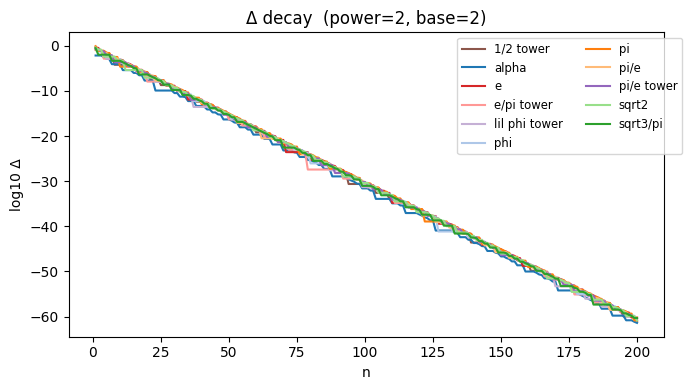

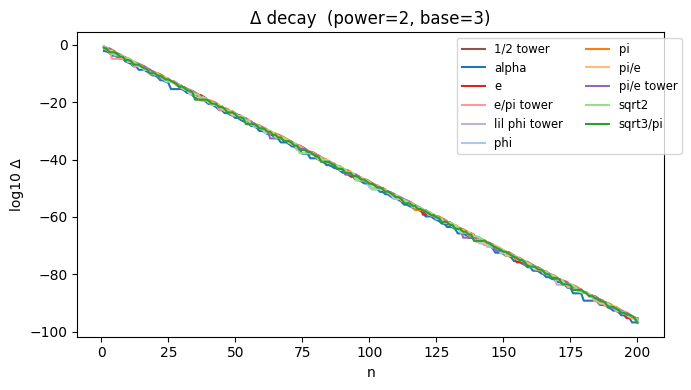

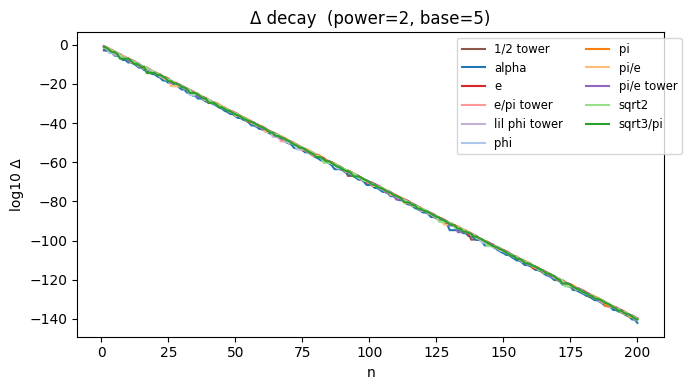

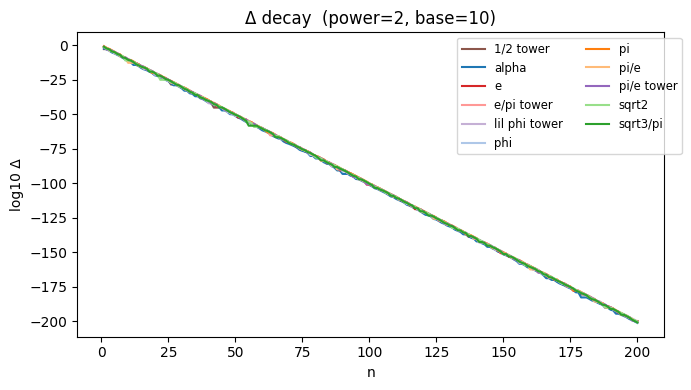

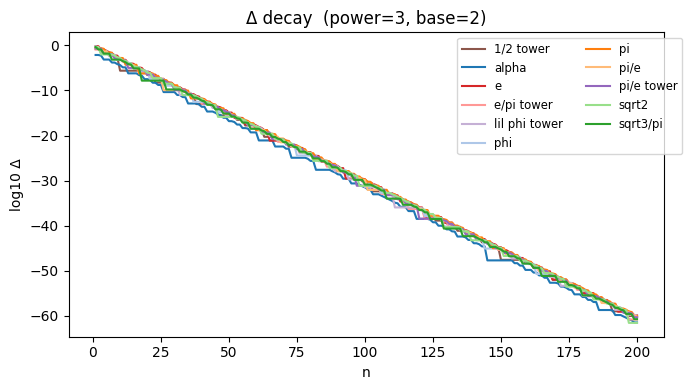

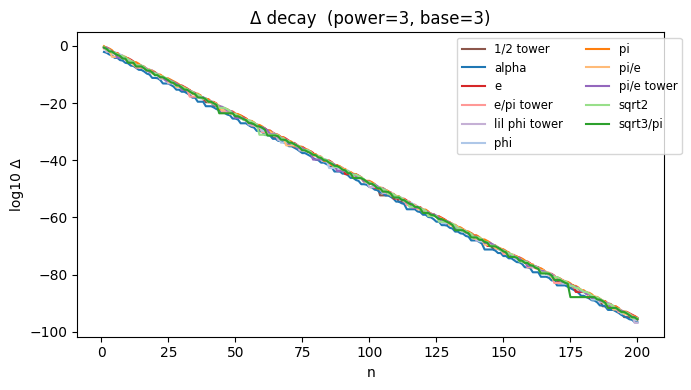

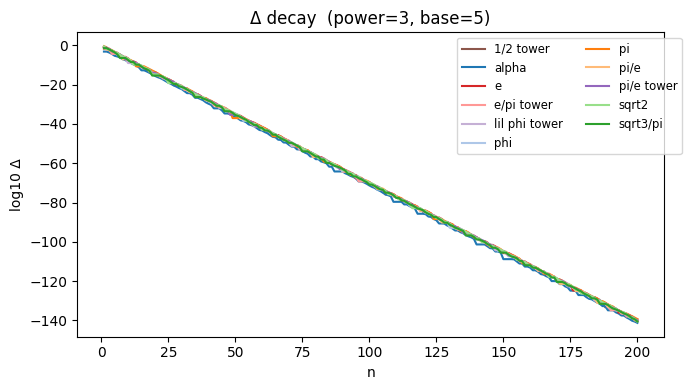

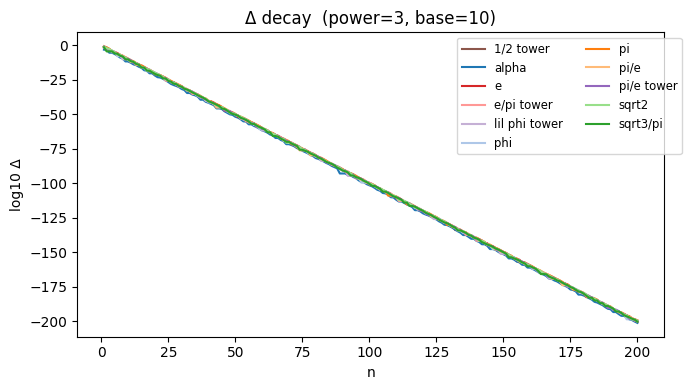

In [19]:
palette = sns.color_palette('tab20', n_colors=len(CONSTANTS))
cmap = dict(zip(CONSTANTS.keys(), palette))

for p in powers:
    for b in bases:
        subset = df[(df['power']==p) & (df['base']==b)]
        plt.figure(figsize=(7,4))
        for name, g in subset.groupby('constant'):
            plt.plot(g['n'], g['log10_delta'],
                     label=name, color=cmap[name])
        plt.title(f'Δ decay  (power={p}, base={b})')
        plt.xlabel('n'); plt.ylabel('log10 Δ')
        plt.legend(ncol=2, fontsize='small', bbox_to_anchor=(1.04,1))
        plt.tight_layout(); plt.show()


In [20]:
print("=== Slope diagnostics vs predicted ===")
for p in powers:
    for b in bases:
        print(f"-- power {p}  base {b} --  expected β = {-p*np.log2(b):.3f}")
        subset = df[(df['power']==p)&(df['base']==b)]
        for name, g in subset.groupby('constant'):
            # Modified to use mp.log and convert to base 2, and convert to numpy array for linregress
            slope, *_ , r, pv, _ = stats.linregress(g['n'], np.array([mp.log(d) / mp.log(2) for d in g['delta']], dtype=float))
            print(f"  {name:14s} slope={slope:7.3f}  R²={r**2:6.4f}")
        print()

# Custom median function for mpf objects
def mpf_median(series):
    sorted_series = sorted(series)
    n = len(sorted_series)
    if n % 2 == 1:
        return sorted_series[n // 2]
    else:
        mid1 = sorted_series[n // 2 - 1]
        mid2 = sorted_series[n // 2]
        return (mid1 + mid2) / 2

# κ extraction using (p=2, b=2) as reference
ref = df[(df['power']==2)&(df['base']==2)&(df['n']>n_max-20)].copy() # Add .copy() to avoid SettingWithCopyWarning
kappa_ref = ref.groupby('constant')['kappa_n'].apply(mpf_median) # Use custom median function

F_const = (1-2**-2) * kappa_ref   # F(C) = κ*(1-2^{-p})

print("=== κ factor F(C) extracted from (p=2, b=2) ===")
print(F_const.to_string())

print("\n=== κ prediction check (show max rel‑error) ===")
for p in powers:
    for b in bases:
        subset = df[(df['power']==p)&(df['base']==b)&(df['n']>n_max-20)].copy() # Add .copy()
        kappa_emp = subset.groupby('constant')['kappa_n'].apply(mpf_median) # Use custom median function
        kappa_pred = F_const / (1-b**-p)
        # Convert to float for relative error calculation, handling potential inf/nan
        rel_error  = (kappa_emp.astype(float) - kappa_pred.astype(float)).abs() / kappa_emp.astype(float)
        print(f"power {p} base {b}: max |Δκ|/κ = {rel_error.max():.2e}")
print("\n=== Tie frequency (power=2, base=2) ===")
tie_freq = df[(df['power']==2)&(df['base']==2)].groupby('constant')['ties']\
           .apply(lambda s: (s>1).mean())
print(tie_freq.to_string())

=== Slope diagnostics vs predicted ===
-- power 2  base 2 --  expected β = -2.000
  1/2 tower      slope= -1.000  R²=0.9995
  alpha          slope= -0.999  R²=0.9995
  e              slope= -0.999  R²=0.9994
  e/pi tower     slope= -0.997  R²=0.9988
  lil phi tower  slope= -1.001  R²=0.9994
  phi            slope= -1.003  R²=0.9992
  pi             slope= -0.999  R²=0.9994
  pi/e           slope= -1.001  R²=0.9997
  pi/e tower     slope= -0.999  R²=0.9997
  sqrt2          slope= -0.999  R²=0.9996
  sqrt3/pi       slope= -1.001  R²=0.9996

-- power 2  base 3 --  expected β = -3.170
  1/2 tower      slope= -1.585  R²=0.9998
  alpha          slope= -1.588  R²=0.9998
  e              slope= -1.590  R²=0.9998
  e/pi tower     slope= -1.582  R²=0.9997
  lil phi tower  slope= -1.585  R²=0.9998
  phi            slope= -1.586  R²=0.9998
  pi             slope= -1.583  R²=0.9998
  pi/e           slope= -1.585  R²=0.9998
  pi/e tower     slope= -1.585  R²=0.9997
  sqrt2          slope= -1.582  R²

/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
